
# Matplotlib — Beginner-to-Pro 🎯

Matplotlib is the **foundation of data visualization in Python**.  
This notebook is a **practical, hands-on guide**: starting from beginner basics → intermediate customization → advanced patterns, and finishing with a **mini Kaggle-ready EDA pipeline**.

✅ Short, clean cells with clear plots  
✅ Realistic toy data + the classic **Iris** dataset (scikit-learn)  
✅ A compact **cheat sheet** at the end for quick reference  
✅ Plots are Matplotlib-first, with clean defaults, accessible palettes, and export-ready figures.

Use this notebook as a **drop-in reference** for your own EDA and projects.


## 0) Reproducibility

In [1]:
# Ensure reproducibility and show library versions.
import warnings, sys
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy as sp
from sklearn.datasets import load_iris
from IPython.display import display

# Random generator for reproducibility
rng = np.random.default_rng(42)

print("Python:", sys.version.split()[0])
print("NumPy:", np.__version__)
print("Pandas:", pd.__version__)
print("Matplotlib:", mpl.__version__)
print("SciPy:", sp.__version__)


Python: 3.11.13
NumPy: 1.26.4
Pandas: 2.2.3
Matplotlib: 3.7.2
SciPy: 1.15.3


## 1) Setup & Style

In [2]:
# Set a consistent style and sensible defaults for all plots.
def use_style(style="default", figsize=(8, 5), fontsize=11):
    try:
        plt.style.use(style)
    except Exception:
        plt.style.use("default")
    plt.rcParams.update({
        "figure.figsize": figsize,
        "font.size": fontsize,
        "axes.spines.top": False,
        "axes.spines.right": False,
        "axes.grid": True,
        "grid.alpha": 0.25,
        "grid.linestyle": "--",
        "axes.prop_cycle": plt.cycler(color=[
            "#0072B2", "#D55E00", "#009E73", "#CC79A7", "#F0E442", "#56B4E9", "#E69F00"
        ]),
        "xtick.major.size": 4,
        "ytick.major.size": 4,
        "figure.autolayout": True
    })
use_style("default")


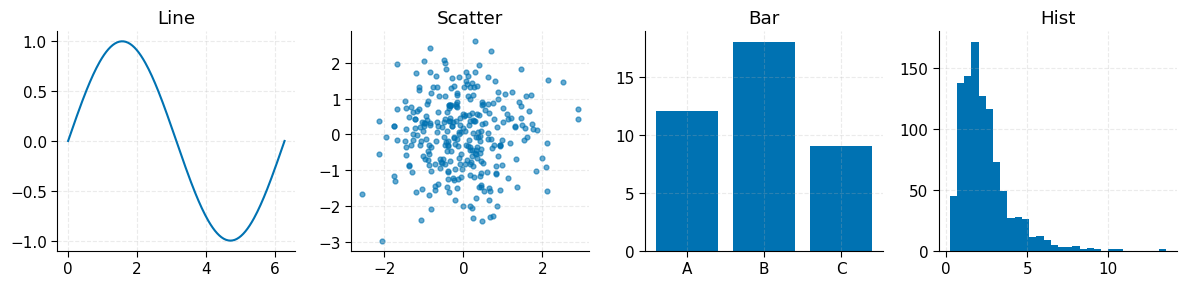

In [3]:
# Quick gallery to preview common chart types at a glance.
fig, axs = plt.subplots(1, 4, figsize=(12, 3))
x = np.linspace(0, 2*np.pi, 200)

axs[0].plot(x, np.sin(x))
axs[0].set_title("Line")

axs[1].scatter(rng.normal(size=300), rng.normal(size=300), s=12, alpha=0.6)
axs[1].set_title("Scatter")

axs[2].bar(["A","B","C"], [12,18,9])
axs[2].set_title("Bar")

axs[3].hist(rng.lognormal(0.7, 0.6, 1000), bins=30)
axs[3].set_title("Hist")

fig.tight_layout()
plt.show()


## 2) Beginner Plots

Simple, readable examples with the most common chart types.

### 2.1 Line

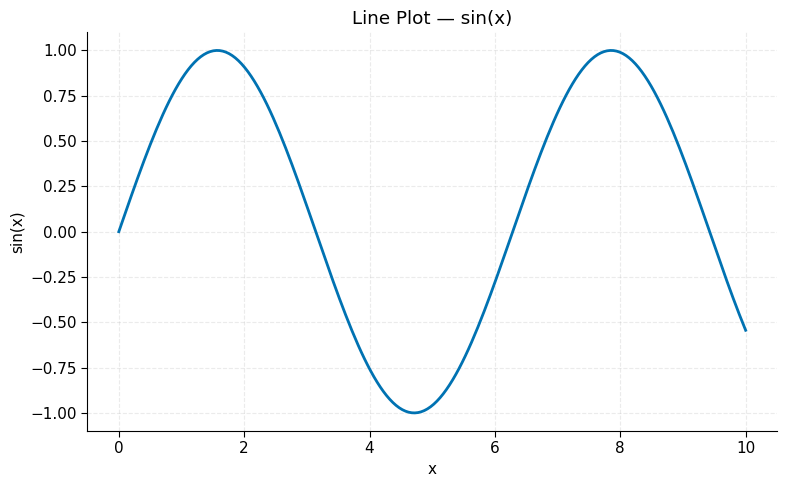

In [4]:
# Simple line plot with labels and a clear title.
x = np.linspace(0, 10, 200)
y = np.sin(x)

fig, ax = plt.subplots()
ax.plot(x, y, linewidth=2)
ax.set(title="Line Plot — sin(x)", xlabel="x", ylabel="sin(x)")
plt.show()


### 2.2 Scatter

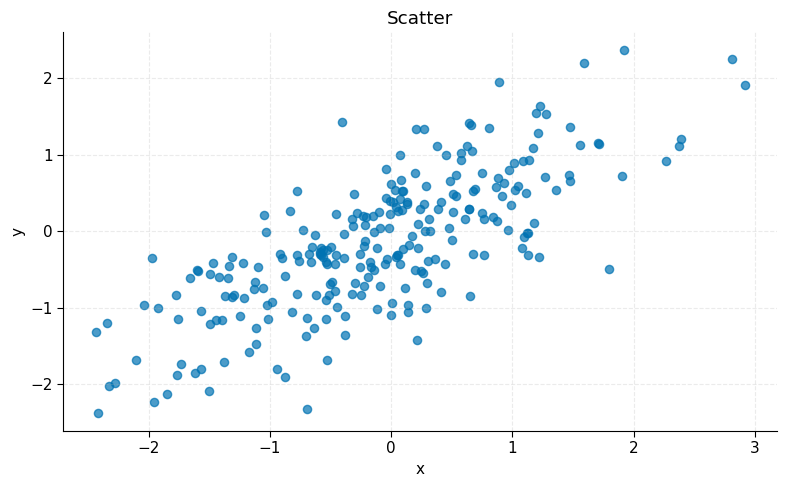

In [5]:
# Basic scatter to show relationship + noise.
n = 250
x = rng.normal(size=n)
y = 0.7 * x + rng.normal(scale=0.6, size=n)

fig, ax = plt.subplots()
ax.scatter(x, y, alpha=0.7, s=35)
ax.set(title="Scatter", xlabel="x", ylabel="y")
plt.show()


### 2.3 Bar / Horizontal Bar

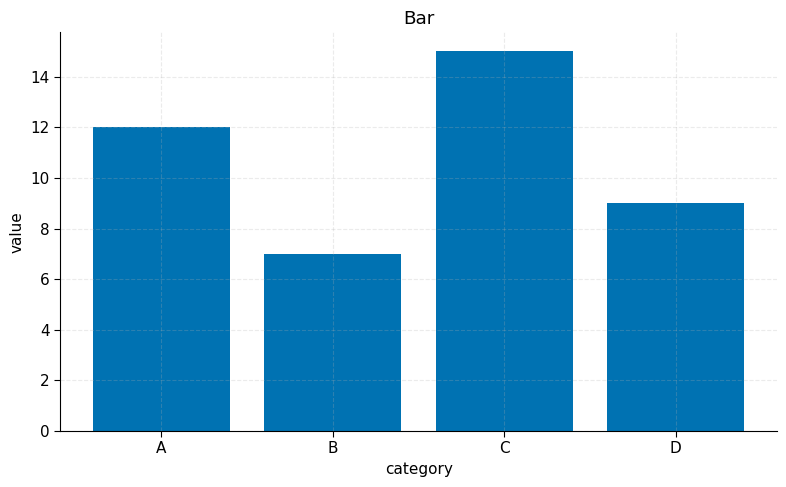

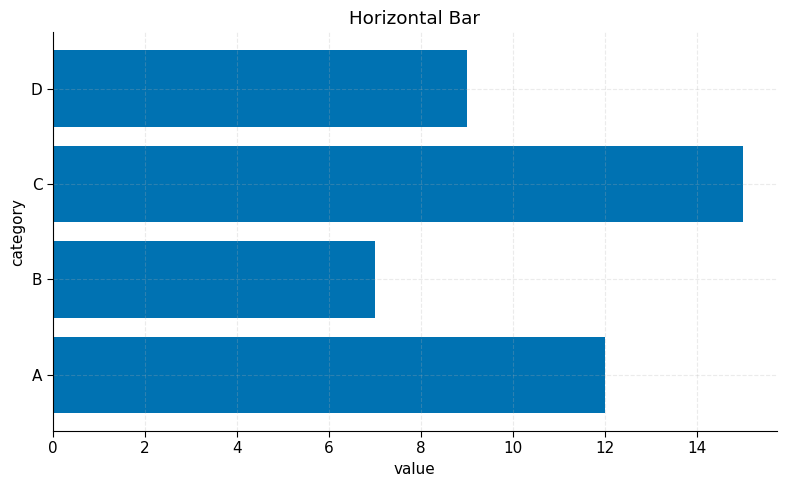

In [6]:
# Categorical comparison—vertical vs horizontal bars.
cats = ["A","B","C","D"]; vals = [12,7,15,9]

fig, ax = plt.subplots()
ax.bar(cats, vals)
ax.set(title="Bar", xlabel="category", ylabel="value")
plt.show()

fig, ax = plt.subplots()
ax.barh(cats, vals)
ax.set(title="Horizontal Bar", xlabel="value", ylabel="category")
plt.show()


### 2.4 Histogram (linear vs log)

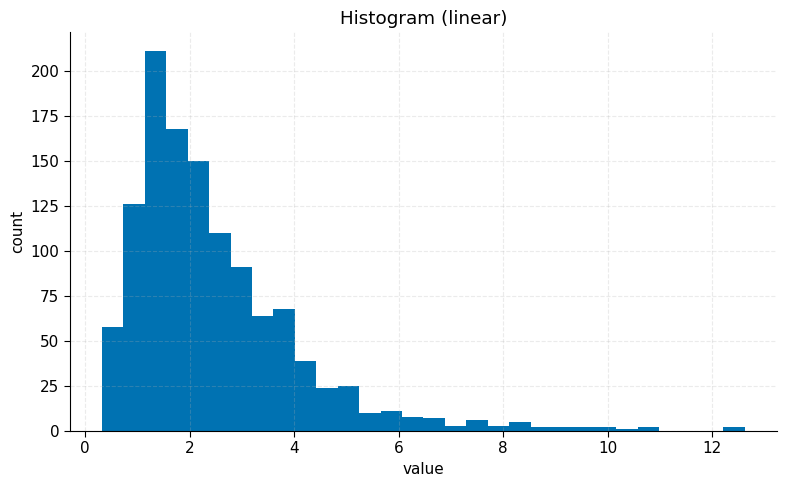

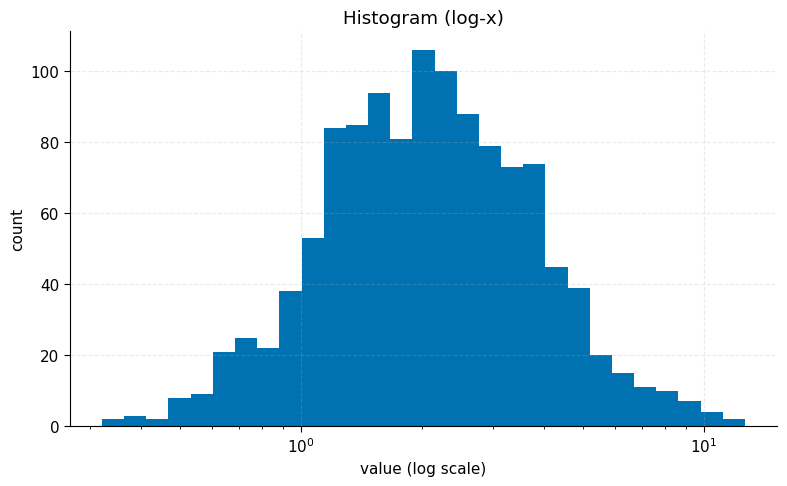

In [7]:
# Show how log-scale helps with heavy-tailed data.
data = rng.lognormal(mean=0.7, sigma=0.6, size=1200)

fig, ax = plt.subplots()
ax.hist(data, bins=30)
ax.set(title="Histogram (linear)", xlabel="value", ylabel="count")
plt.show()

bins = np.logspace(np.log10(data.min()), np.log10(data.max()), 30)
fig, ax = plt.subplots()
ax.hist(data, bins=bins)
ax.set_xscale("log")
ax.set(title="Histogram (log-x)", xlabel="value (log scale)", ylabel="count")
plt.show()


### 2.5 Histogram + KDE


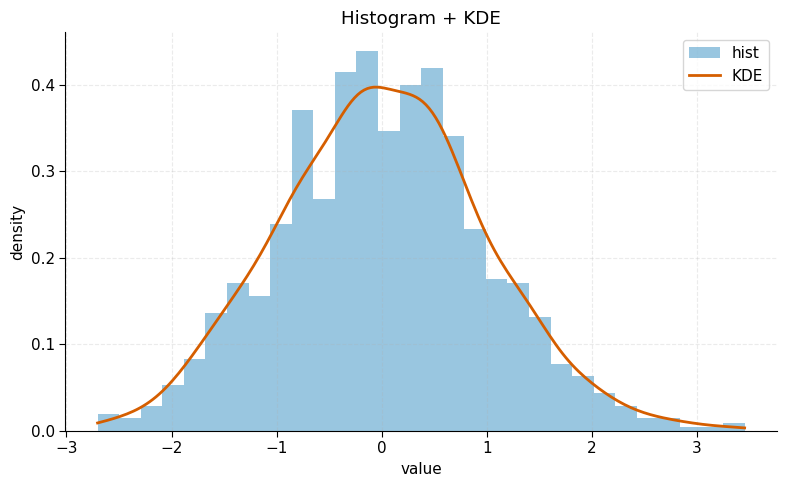

In [8]:
# Compare histogram (bins) with smooth kernel density estimate (KDE).
from scipy.stats import gaussian_kde
data = rng.normal(size=1000)
density = gaussian_kde(data)
xs = np.linspace(data.min(), data.max(), 200)

fig, ax = plt.subplots()
ax.hist(data, bins=30, density=True, alpha=0.4, label="hist")
ax.plot(xs, density(xs), lw=2, label="KDE")
ax.set(title="Histogram + KDE", xlabel="value", ylabel="density")
ax.legend()
plt.show()


### 2.6 ECDF 

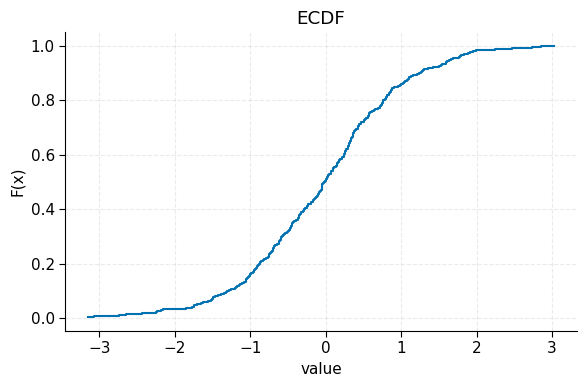

In [9]:
# Bin-free cumulative view of a distribution.
vals = rng.normal(size=500)
vals = np.sort(vals)
cdf = np.arange(1, len(vals)+1) / len(vals)

plt.figure(figsize=(6,4))
plt.plot(vals, cdf, drawstyle="steps-post")
plt.title("ECDF")
plt.xlabel("value"); plt.ylabel("F(x)")
plt.show()


### 2.7 Box/Violin

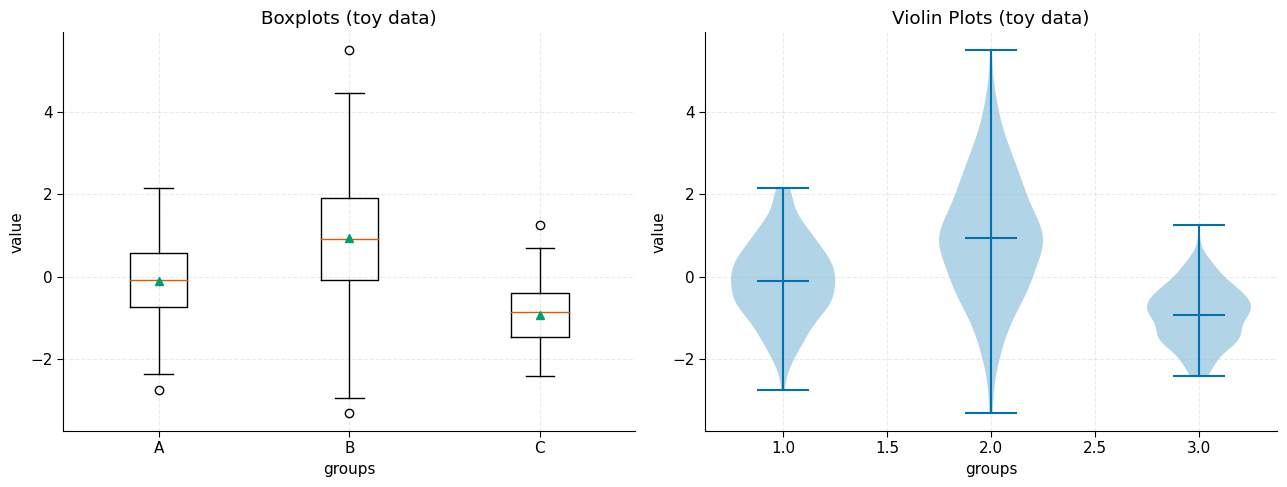

In [10]:
# Compare center/spread/shape across groups.
samples = [rng.normal(size=200) * s + m for s, m in [(1,0),(1.5,1),(0.7,-1)]]
labels = ["A","B","C"]

fig, axs = plt.subplots(1, 2, figsize=(13, 5))
axs[0].boxplot(samples, labels=labels, showmeans=True)
axs[0].set_title("Boxplots (toy data)")
axs[1].violinplot(samples, showmeans=True, showextrema=True)
axs[1].set_title("Violin Plots (toy data)")
for ax in axs:
    ax.set_xlabel("groups"); ax.set_ylabel("value")
plt.show()


### 2.8 Stacked Area Plot

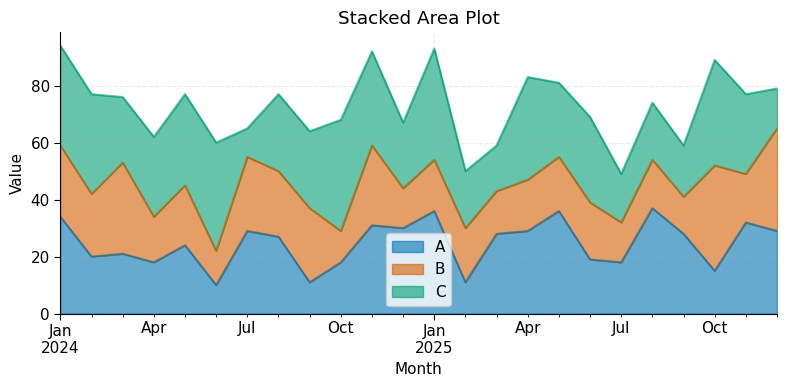

In [11]:
# Show contribution of multiple series over time with area stacking.
dates = pd.date_range("2024-01-01", periods=24, freq="M")
data = rng.integers(10, 40, size=(len(dates), 3))
df_area = pd.DataFrame(data, index=dates, columns=["A","B","C"])

ax = df_area.plot.area(alpha=0.6, figsize=(8,4))
ax.set(title="Stacked Area Plot", xlabel="Month", ylabel="Value")
plt.show()


## 3) Intermediate Customization

Axis formatting, subplots, annotations, legends — the bread and butter of clarity.

### 3.1 Subplots

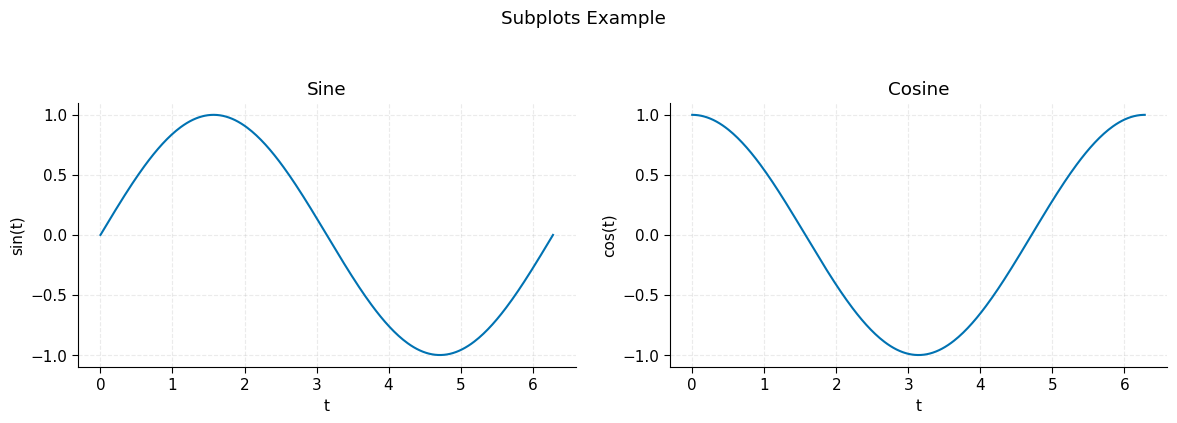

In [12]:
# Subplots—two related views sharing one story.
t = np.linspace(0, 2*np.pi, 300)
y1, y2 = np.sin(t), np.cos(t)

fig, axs = plt.subplots(1, 2, figsize=(12, 4))
axs[0].plot(t, y1); axs[0].set(title="Sine", xlabel="t", ylabel="sin(t)")
axs[1].plot(t, y2); axs[1].set(title="Cosine", xlabel="t", ylabel="cos(t)")
fig.suptitle("Subplots Example", y=1.05)
plt.show()


### 3.2 Axis control + Annotation

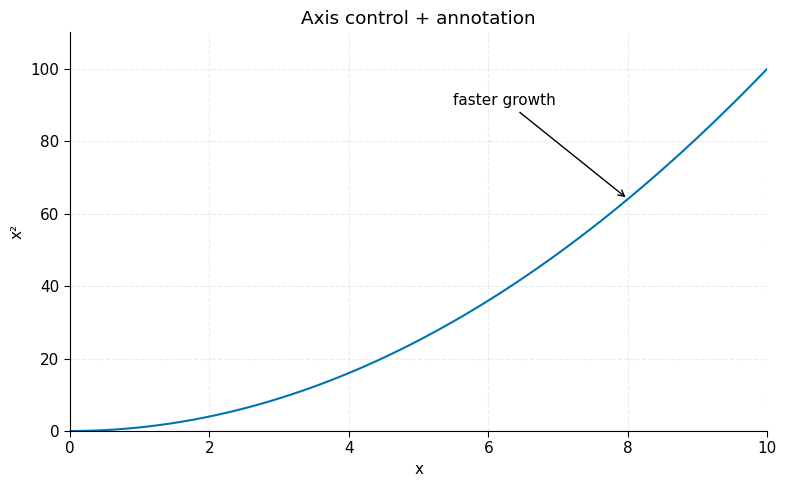

In [13]:
# Set axis limits and add a simple annotation.
x = np.linspace(0, 10, 100); y = x**2

fig, ax = plt.subplots()
ax.plot(x, y)
ax.set(title="Axis control + annotation", xlabel="x", ylabel="x²")
ax.set_xlim(0, 10); ax.set_ylim(0, 110)
ax.annotate("faster growth", xy=(8, 64), xytext=(5.5, 90),
            arrowprops=dict(arrowstyle="->"))
plt.show()


### 3.3 Legend basics

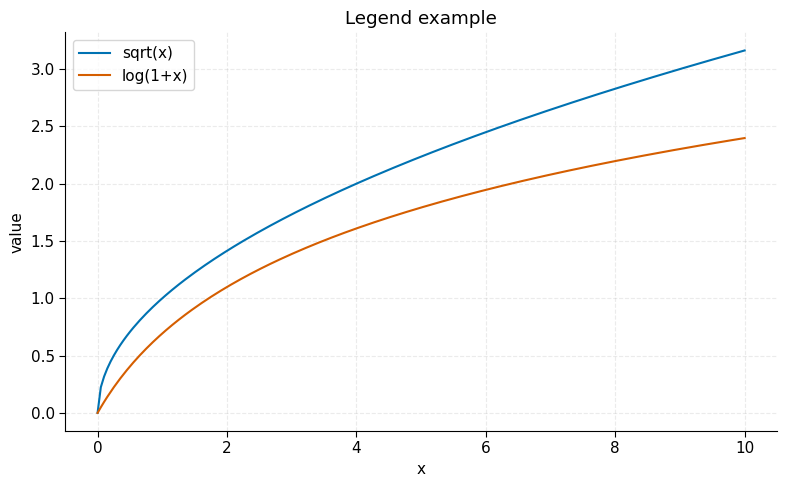

In [14]:
# Legends clarify multiple series—keep labels short.
x = np.linspace(0, 10, 200)
fig, ax = plt.subplots()
ax.plot(x, np.sqrt(x), label="sqrt(x)")
ax.plot(x, np.log1p(x), label="log(1+x)")
ax.legend()
ax.set(title="Legend example", xlabel="x", ylabel="value")
plt.show()


### 3.4 Time series with proper date formatting

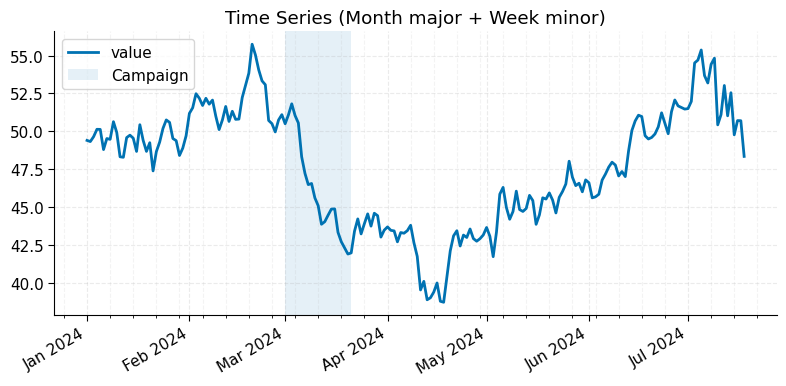

In [15]:
# Time series with month/weekday ticks + shaded period.
import matplotlib.dates as mdates
dates = pd.date_range("2024-01-01", periods=200, freq="D")
series = pd.Series(np.cumsum(rng.normal(size=len(dates))) + 50, index=dates)

fig, ax = plt.subplots(figsize=(8,4))
ax.plot(series.index, series.values, linewidth=2, label="value")
ax.set_title("Time Series (Month major + Week minor)")
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))
ax.xaxis.set_minor_locator(mdates.WeekdayLocator(byweekday=mdates.MO))
ax.grid(which="minor", alpha=0.15)
ax.axvspan(pd.Timestamp("2024-03-01"), pd.Timestamp("2024-03-21"), alpha=0.10, label="Campaign")
ax.legend(); fig.autofmt_xdate()
plt.show()


### 3.5 Error Bars + Highlights

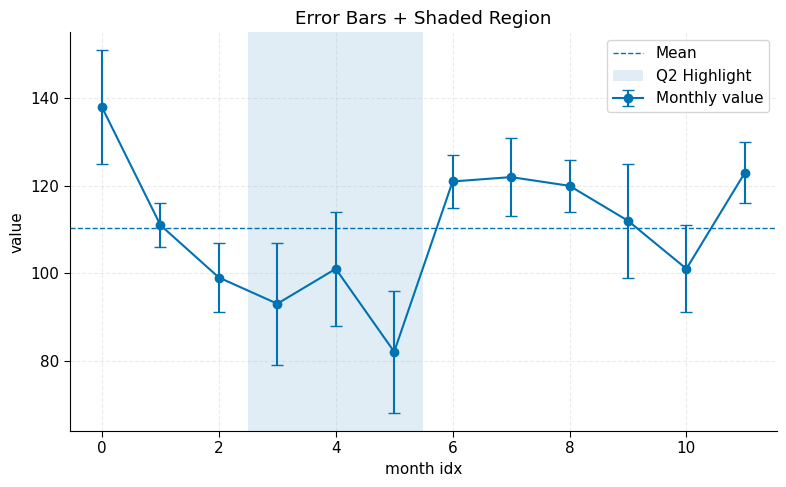

In [16]:
# Add uncertainty with error bars; highlight a period.
x = np.arange(12)
y = rng.integers(80, 140, 12)
err = rng.integers(5, 15, 12)

fig, ax = plt.subplots()
ax.errorbar(x, y, yerr=err, fmt="-o", capsize=4, label="Monthly value")
ax.axhline(y.mean(), ls="--", lw=1, label="Mean")
ax.axvspan(2.5, 5.5, alpha=0.12, label="Q2 Highlight")
ax.set(title="Error Bars + Shaded Region", xlabel="month idx", ylabel="value")
ax.legend()
plt.show()


### 3.6 Tick Formatters (Percent/Locator)

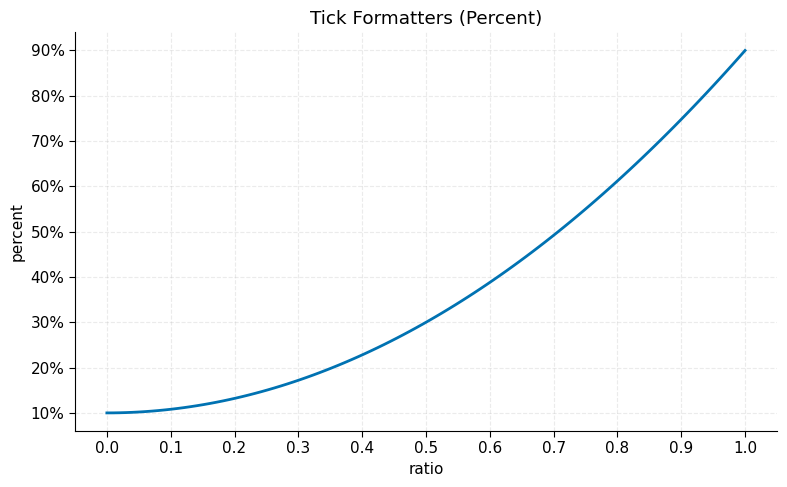

In [17]:
# Show tick formatters (percent) and locators.
import matplotlib.ticker as mtick

x = np.linspace(0, 1, 100)
y = (x**2) * 0.8 + 0.1

fig, ax = plt.subplots()
ax.plot(x, y, lw=2)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
ax.xaxis.set_major_locator(mtick.MultipleLocator(0.1))
ax.set(title="Tick Formatters (Percent)", xlabel="ratio", ylabel="percent")
plt.show()


## 4) Advanced Patterns

Some patterns you’ll reach for in real EDA and dashboards.

### 4.1 Grouped & Stacked Bars

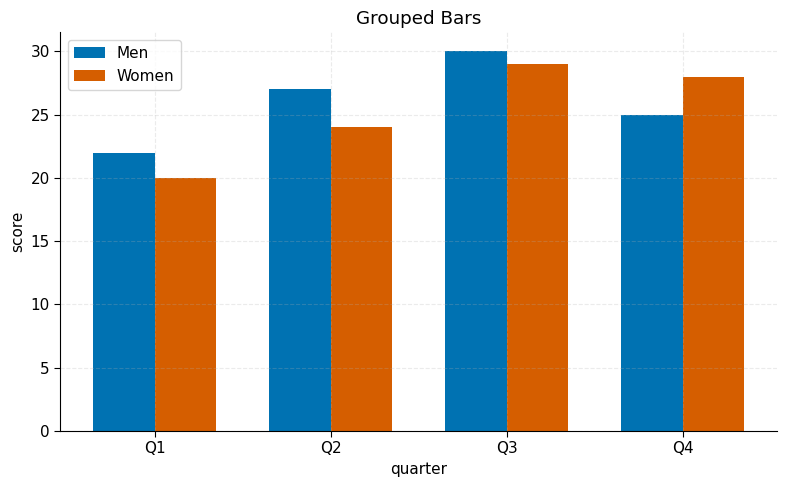

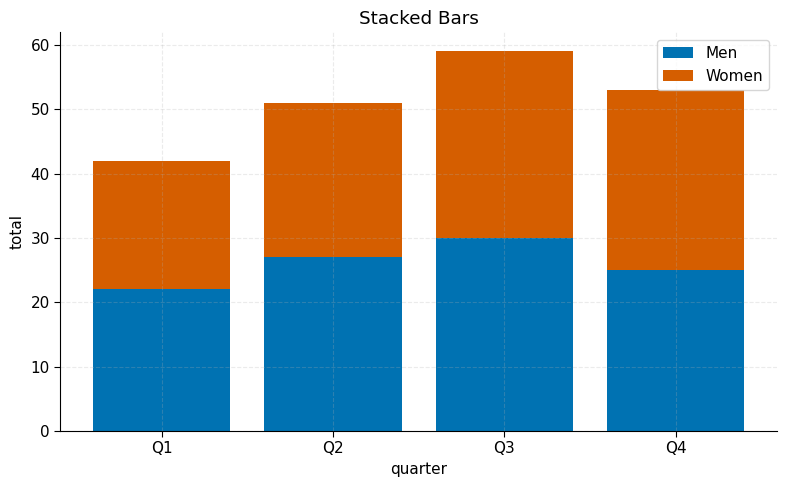

In [18]:
# Grouped vs stacked bars—two ways to compare categories.
groups = ["Q1","Q2","Q3","Q4"]
men = np.array([22,27,30,25])
women = np.array([20,24,29,28])
X = np.arange(len(groups)); W = 0.35

# Grouped
fig, ax = plt.subplots()
ax.bar(X - W/2, men, W, label="Men")
ax.bar(X + W/2, women, W, label="Women")
ax.set(title="Grouped Bars", xlabel="quarter", ylabel="score")
ax.set_xticks(X); ax.set_xticklabels(groups)
ax.legend(); plt.show()

# Stacked
fig, ax = plt.subplots()
ax.bar(groups, men, label="Men")
ax.bar(groups, women, bottom=men, label="Women")
ax.set(title="Stacked Bars", xlabel="quarter", ylabel="total")
ax.legend(); plt.show()


### 4.2 Twin Axes (line + bars)

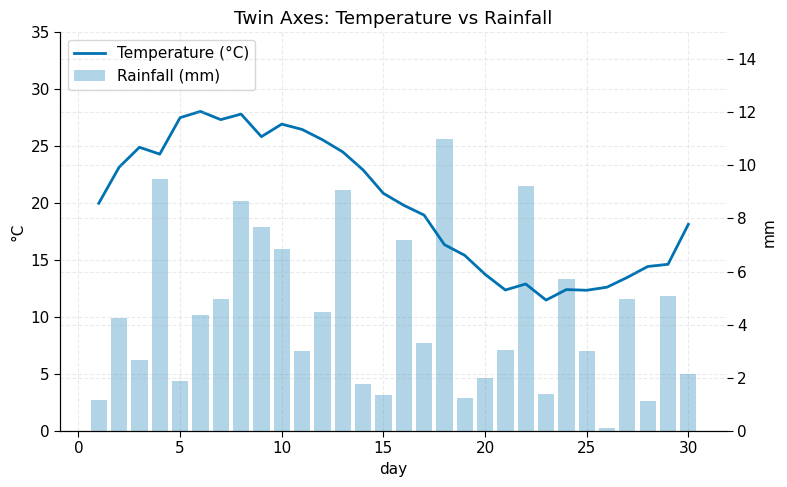

In [19]:
# Twin axes to combine different scales (line + bars).
days = np.arange(1, 31)
temp = 20 + 8*np.sin(days/5) + rng.normal(size=len(days))
rain = np.abs(rng.normal(size=len(days))) * 5

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ln1, = ax1.plot(days, temp, linewidth=2, label="Temperature (°C)")
bar = ax2.bar(days, rain, alpha=0.3, label="Rainfall (mm)")

# combine legends
lines, labels = ax1.get_legend_handles_labels()
bars, bar_labels = ax2.get_legend_handles_labels()
ax1.legend(lines + bars, labels + bar_labels, loc="upper left")

ax1.set_xlabel("day"); ax1.set_ylabel("°C"); ax2.set_ylabel("mm")
ax1.set_title("Twin Axes: Temperature vs Rainfall")
ax1.set_ylim(0, 35)   
ax2.set_ylim(0, 15)  
plt.show()


### 4.3 Broken Axis (outlier-friendly)

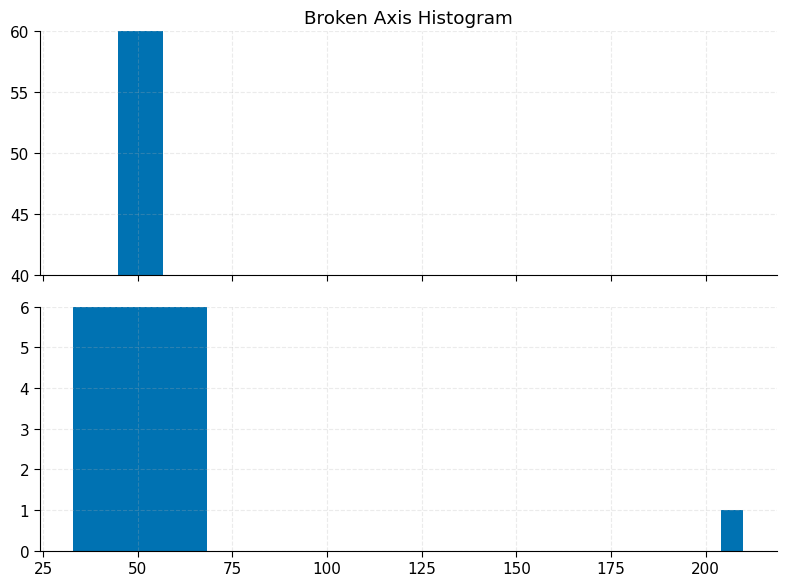

In [20]:
# Broken axis to visualize an outlier without losing detail.
vals = np.concatenate([rng.normal(size=300)*5 + 50, np.array([210])])
fig, (ax, ax2) = plt.subplots(2, 1, sharex=True, figsize=(8, 6))
ax.hist(vals, bins=30); ax2.hist(vals, bins=30)
ax.set_ylim(40, 60); ax2.set_ylim(0, 6)
ax.set_title("Broken Axis Histogram")
plt.show()


### 4.4 Inset (zoomed detail)

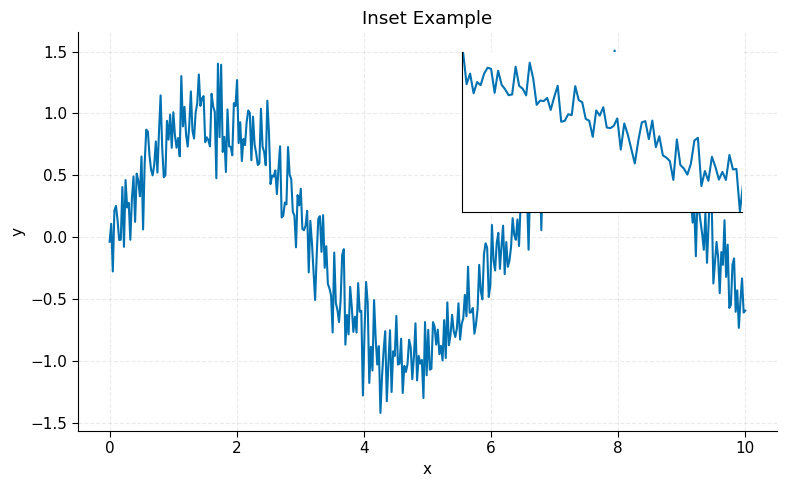

In [21]:
#  Inset shows a zoomed detail without leaving the main view.
x = np.linspace(0, 10, 400)
y = np.sin(x) + 0.2 * rng.normal(size=len(x))

fig, ax = plt.subplots()
ax.plot(x, y)
ax.set(title="Inset Example", xlabel="x", ylabel="y")

axins = ax.inset_axes([0.55, 0.55, 0.4, 0.4])  
axins.plot(x, y)
mask = (x >= 2) & (x <= 4)
axins.set_xlim(2, 4); axins.set_ylim(y[mask].min(), y[mask].max())
axins.set_xticks([]); axins.set_yticks([])

fig.canvas.draw()
plt.show()


### 4.5 3D Surface

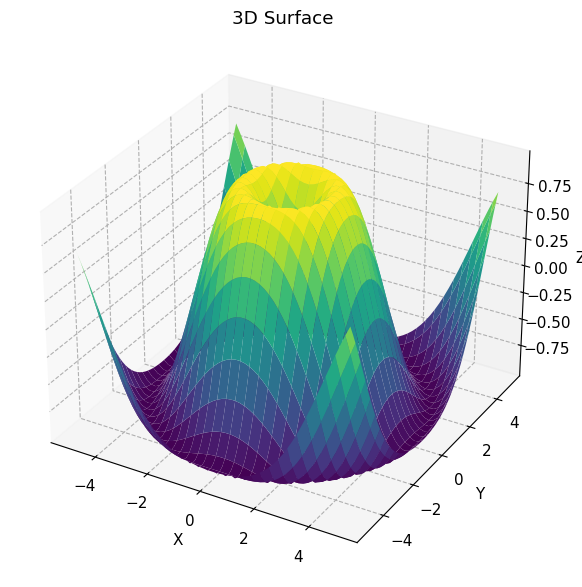

In [22]:
# 3D surface—when the third dimension carries meaning.
u = np.linspace(-5, 5, 60); v = np.linspace(-5, 5, 60)
U, V = np.meshgrid(u, v)
Z = np.sin(np.sqrt(U**2 + V**2))

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(U, V, Z, cmap="viridis", linewidth=0, antialiased=True)
ax.set_title("3D Surface")
ax.set_xlabel("X"); ax.set_ylabel("Y"); ax.set_zlabel("Z")
plt.show()


### 4.6 Dense clouds: Hexbin + Rasterized scatter

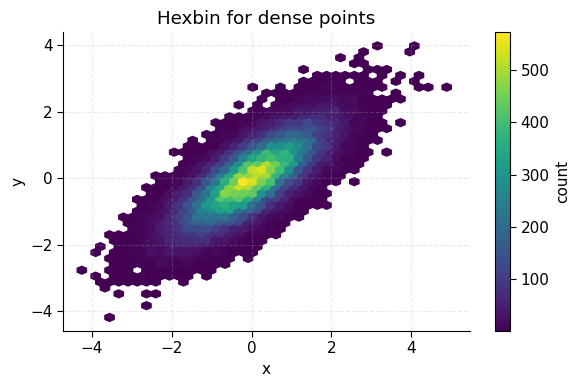

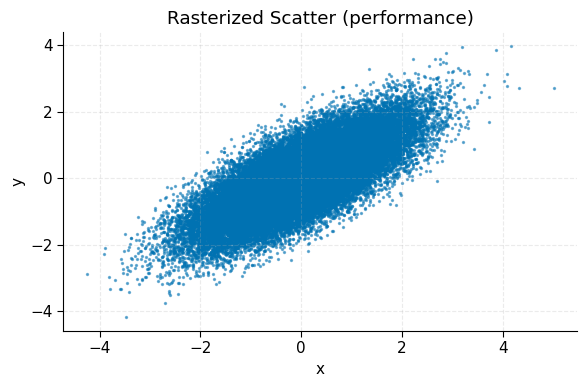

In [23]:
# Handle dense point clouds with hexbin or rasterized scatter.
x = rng.normal(size=50_000)
y = 0.7*x + 0.6*rng.normal(size=50_000)

# Hexbin (better than raw scatter for dense data)
plt.figure(figsize=(6,4))
hb = plt.hexbin(x, y, gridsize=40, mincnt=1)
plt.colorbar(label="count")
plt.title("Hexbin for dense points")
plt.xlabel("x"); plt.ylabel("y")
plt.show()

# Rasterized scatter (faster rendering for many points)
plt.figure(figsize=(6,4))
plt.scatter(x, y, s=2, alpha=0.5, rasterized=True)
plt.title("Rasterized Scatter (performance)")
plt.xlabel("x"); plt.ylabel("y")
plt.show()


### 4.7 Performance: LineCollection

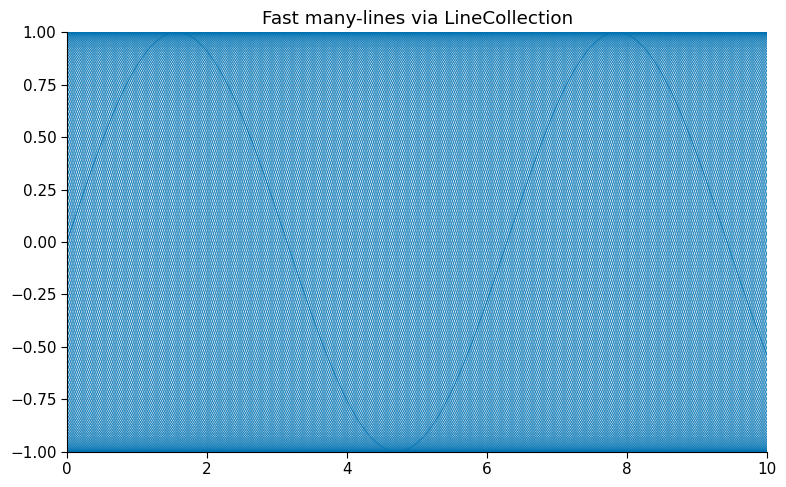

In [24]:
# Draw many lines efficiently using LineCollection.
from matplotlib.collections import LineCollection

x = np.linspace(0, 10, 1_000)
Y = np.array([np.sin(x + s) for s in np.linspace(0, 2*np.pi, 200)])  # 200 series
segs = [np.column_stack([x, y]) for y in Y]

fig, ax = plt.subplots()
lc = LineCollection(segs, linewidths=0.8, alpha=0.7)
ax.add_collection(lc)
ax.set_xlim(x.min(), x.max()); ax.set_ylim(Y.min(), Y.max())
ax.set_title("Fast many-lines via LineCollection")
plt.show()


## 5) Integration Tricks 

### Pandas → Matplotlib interop (quick wins).

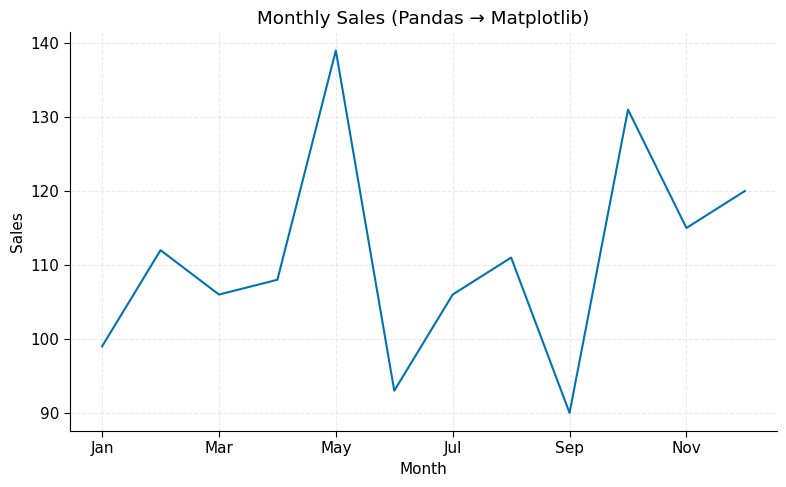

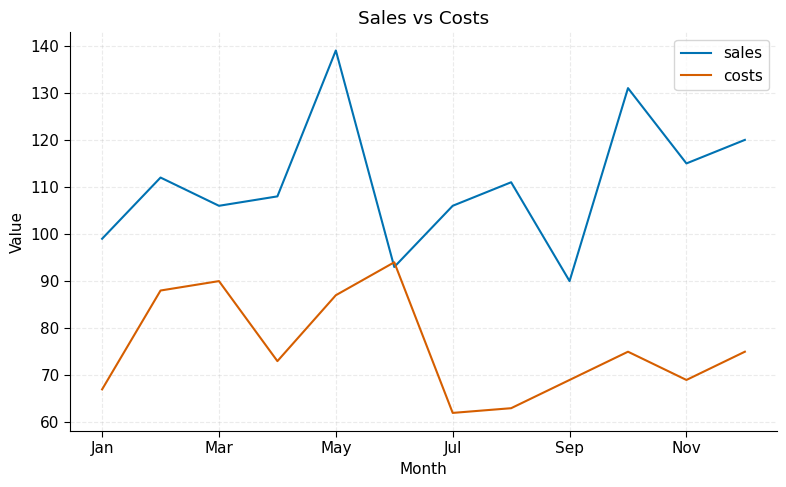

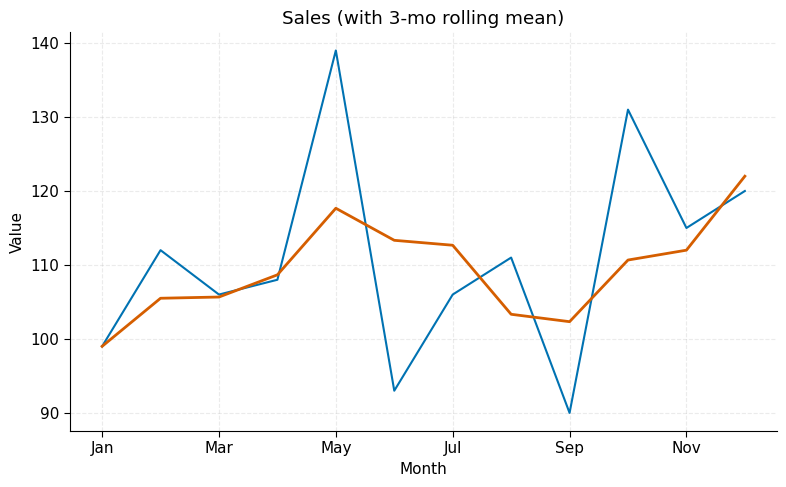

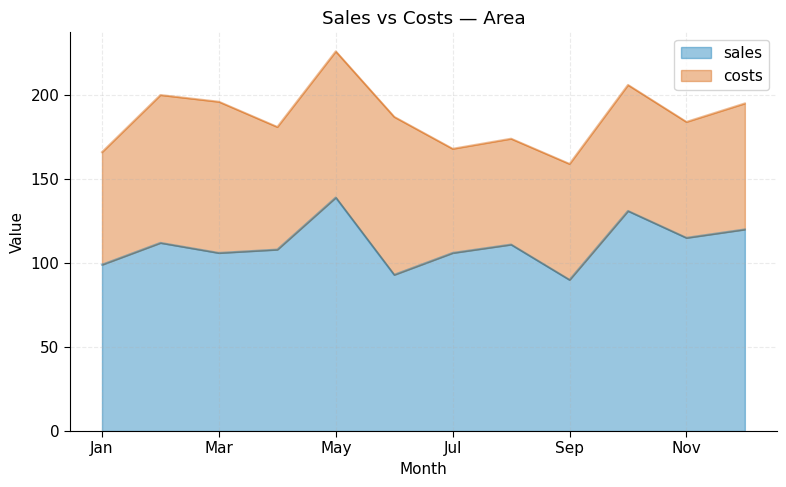

In [25]:
# Quick wins—using Pandas dataframes directly with Matplotlib.
df_monthly = pd.DataFrame({
    "month": ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"],
    "sales": rng.integers(80, 140, 12),
    "costs": rng.integers(40, 100, 12),

}).set_index("month")

# Single series
ax = df_monthly["sales"].plot(kind="line")
ax.set(title="Monthly Sales (Pandas → Matplotlib)", xlabel="Month", ylabel="Sales")
plt.show()

# Multiple series
ax = df_monthly.plot(y=["sales","costs"])
ax.set(title="Sales vs Costs", xlabel="Month", ylabel="Value")
plt.show()

# Rolling mean overlay (common in dashboards)
ax = df_monthly["sales"].plot()
df_monthly["sales"].rolling(3, min_periods=1).mean().plot(ax=ax, linewidth=2)
ax.set(title="Sales (with 3-mo rolling mean)", xlabel="Month", ylabel="Value")
plt.show()

# Area chart (quick comparative glance)
ax = df_monthly.plot.area(alpha=0.4)
ax.set(title="Sales vs Costs — Area", xlabel="Month", ylabel="Value")
plt.show()


# Quick data check (Integration section)


In [26]:
df_monthly.info()
display(df_monthly.head())
display(df_monthly.describe().T)


<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, Jan to Dec
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   sales   12 non-null     int64
 1   costs   12 non-null     int64
dtypes: int64(2)
memory usage: 588.0+ bytes


,sales,costs
month,,
Jan,99,67
Feb,112,88
Mar,106,90
Apr,108,73
May,139,87


,count,mean,std,min,25%,50%,75%,max
sales,12.0,110.833333,14.300879,90.0,104.25,109.5,116.25,139.0
costs,12.0,76.000000,11.037127,62.0,68.50,74.0,87.25,94.0


## 6) Mini EDA Pipeline (Matplotlib-only) — Iris

In [27]:
# Load Iris as a small, clean dataset for the mini-EDA.
iris = load_iris(as_frame=True)
df = iris.frame.rename(columns={"target":"species"})
df["species"] = df["species"].map(dict(enumerate(iris.target_names)))

print("Shape:", df.shape)
df.info()
display(df.head())
display(df.describe().T)


Shape: (150, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


### 6.1 Class Balance

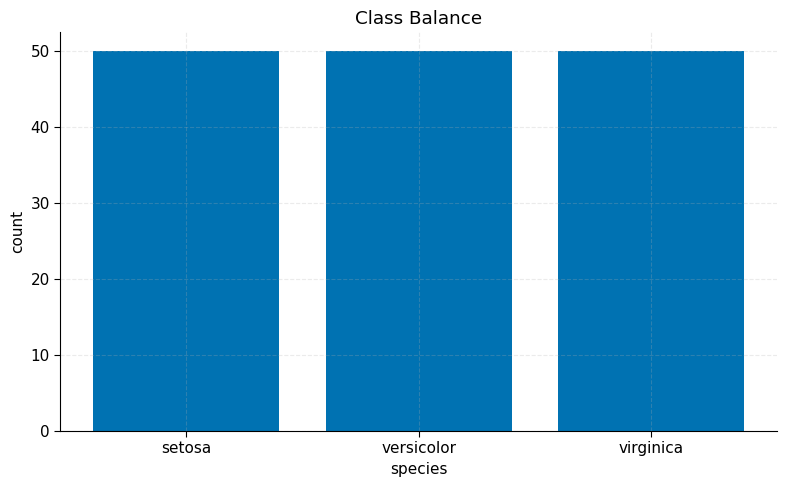

In [28]:
# Check class balance—how many samples per species.
counts = df["species"].value_counts().sort_index()
fig, ax = plt.subplots()
ax.bar(counts.index, counts.values)
ax.set(title="Class Balance", xlabel="species", ylabel="count")
plt.show()


### 6.2 Numeric Histograms

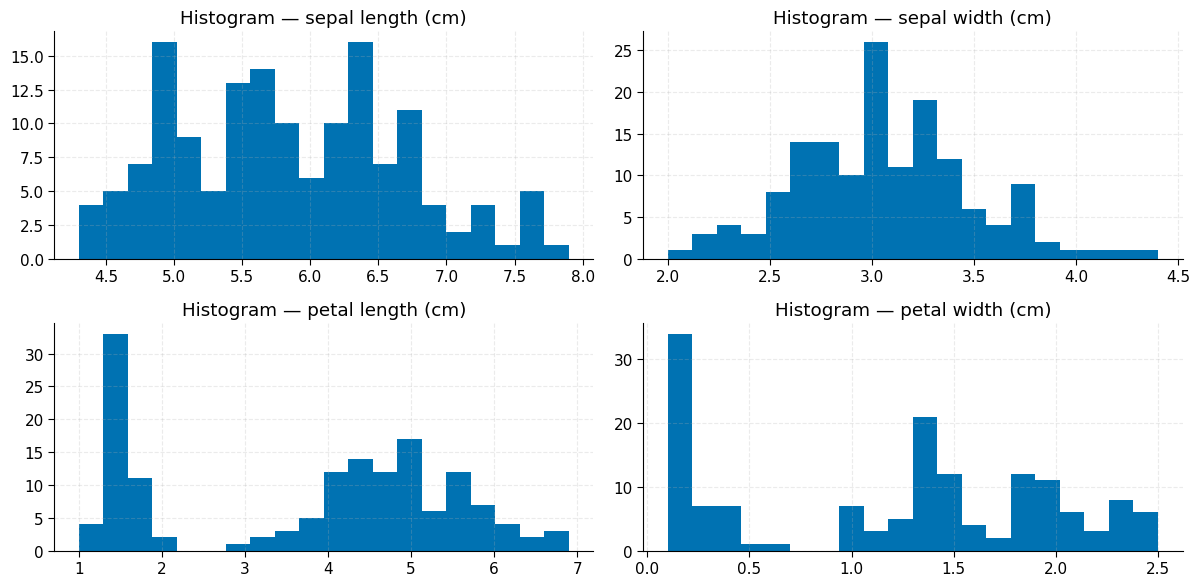

In [29]:
# Scan numeric distributions quickly with small multiples.
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
m = len(num_cols); rows = int(np.ceil(m/2))
fig, axes = plt.subplots(rows, 2, figsize=(12, 3*rows)); axes = axes.ravel()

for i, c in enumerate(num_cols):
    axes[i].hist(df[c], bins=20)
    axes[i].set_title(f"Histogram — {c}")
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)
plt.show()


### 6.3 Scatter by species (two features)

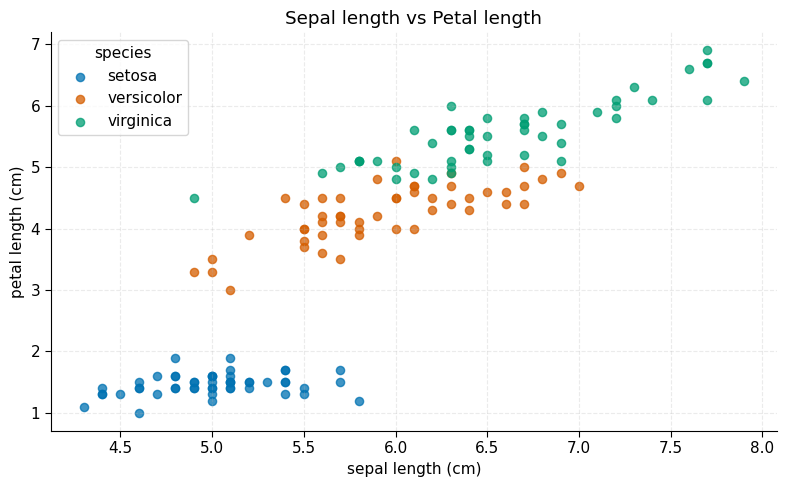

In [30]:
# Simple 2D separation view by species (scatter).
fig, ax = plt.subplots()
for sp in df["species"].unique():
    part = df[df["species"] == sp]
    ax.scatter(part["sepal length (cm)"], part["petal length (cm)"], alpha=0.75, s=35, label=sp)
ax.set(title="Sepal length vs Petal length", xlabel="sepal length (cm)", ylabel="petal length (cm)")
ax.legend(title="species")
plt.show()


### 6.4 Correlation Heatmap

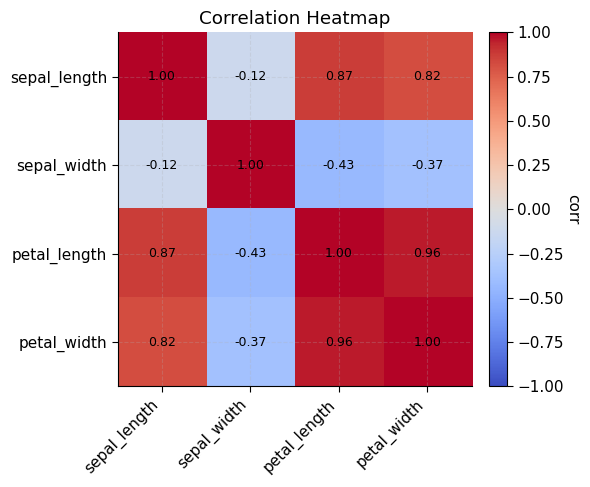

In [31]:
# Correlation heatmap to spot linear relationships.
corr = df.select_dtypes(include=[np.number]).corr().round(2)
num_cols = corr.columns.tolist()
fig, ax = plt.subplots(figsize=(6, 5))
im = ax.imshow(corr, cmap="coolwarm", vmin=-1, vmax=1)
ax.set_title("Correlation Heatmap")
ticks = range(len(num_cols))
short = [c.replace(" (cm)", "").replace(" ", "_") for c in num_cols]
ax.set_xticks(ticks, short, rotation=45, ha="right")
ax.set_yticks(ticks, short)
for i in ticks:
    for j in ticks:
        ax.text(j, i, f"{corr.iloc[i, j]:.2f}", ha="center", va="center", fontsize=9)
cbar = fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
cbar.ax.set_ylabel("corr", rotation=270, labelpad=12)
plt.show()


### 6.5 Box/Violin

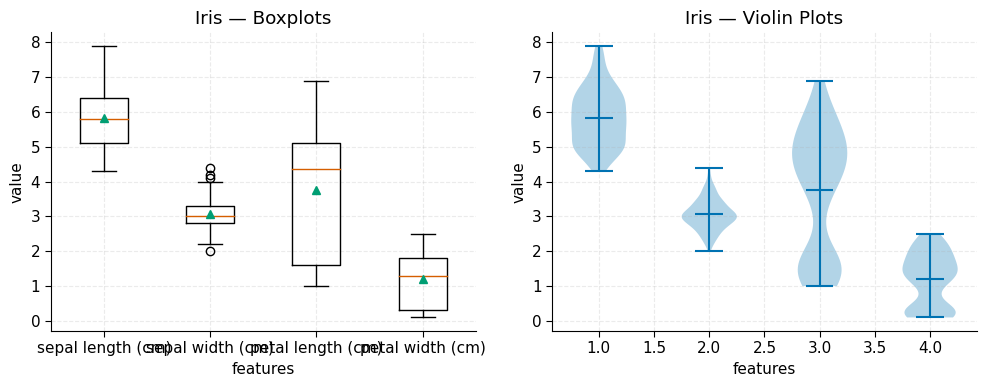

In [32]:
# Compare feature distributions via box/violin for Iris.
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
axs[0].boxplot([df[c] for c in num_cols], labels=num_cols, showmeans=True)
axs[0].set_title("Iris — Boxplots")
axs[1].violinplot([df[c] for c in num_cols], showmeans=True, showextrema=True)
axs[1].set_title("Iris — Violin Plots")
for ax in axs:
    ax.set_xlabel("features"); ax.set_ylabel("value")
plt.show()


### 6.6 Scatter Matrix

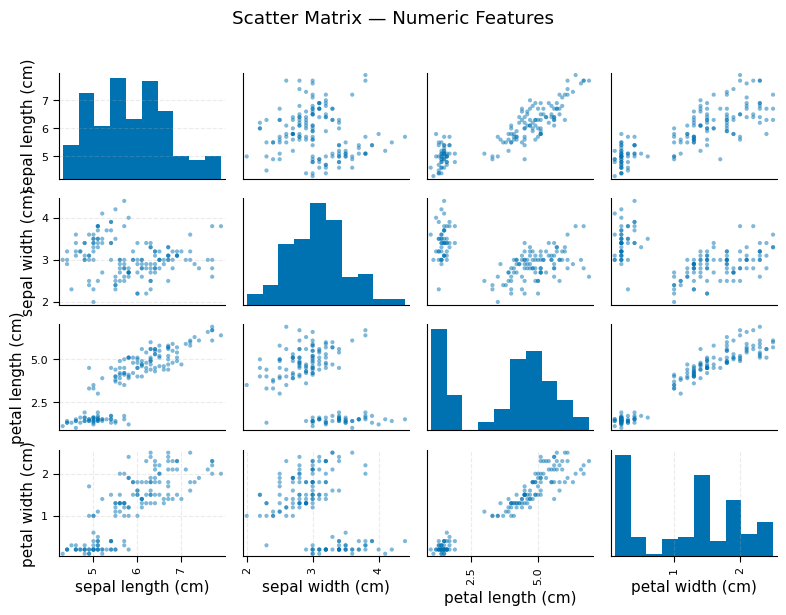

In [33]:
from pandas.plotting import scatter_matrix
scatter_matrix(df.select_dtypes(include=[np.number]), figsize=(8,6), diagonal='hist')
plt.suptitle("Scatter Matrix — Numeric Features", y=1.02)
plt.show()



## 7) Best Practices & Pitfalls

- Prefer `fig, ax = plt.subplots()` over stateful `plt.*` in long notebooks.  
- Keep one small `use_style()` to enforce consistent visuals.  
- Use `autolayout=True` or `plt.tight_layout()` / `constrained_layout=True` to reduce clipping.  
- Legends should earn their keep; avoid overloading markers, lines, and labels at once.  
- For heavy tails, consider log scales: `ax.set_xscale("log")` / `ax.set_yscale("log")`.  
- Don’t hardcode colors for categories that may change — let Matplotlib cycle them.  
- One idea per cell. A short caption before/after the cell is often enough.  
- Save artifacts when needed: `fig.savefig("figure.png", dpi=200, bbox_inches="tight")`.


### Saving Figures


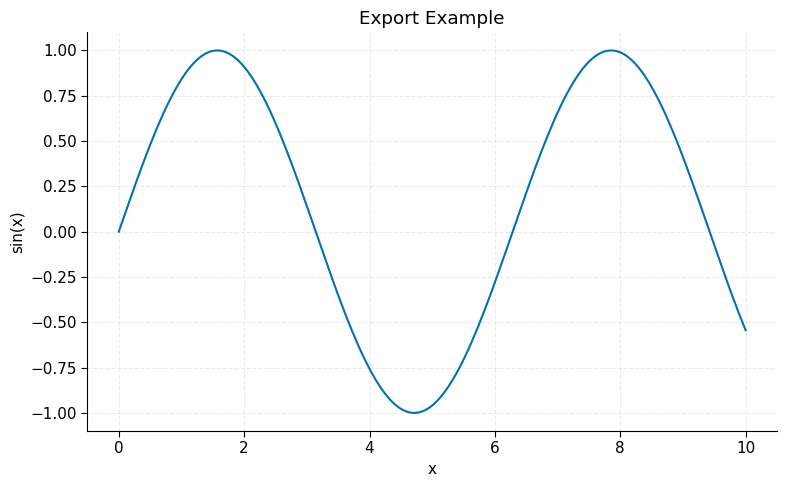

In [34]:
fig, ax = plt.subplots()
ax.plot(np.linspace(0,10,200), np.sin(np.linspace(0,10,200)))
ax.set(title="Export Example", xlabel="x", ylabel="sin(x)")
fig.savefig("export_example.png", dpi=200, bbox_inches="tight")



## 8) Cheat Sheet

| Goal | Function | Minimal Example | Gotcha |
|---|---|---|---|
| Line | `ax.plot(x,y)` | `ax.plot(x,y)` | Add labels & legend if needed |
| Scatter | `ax.scatter(x,y)` | `ax.scatter(x,y,alpha=0.6)` | Overplotting → use alpha/bin/hex |
| Bar/Barh | `ax.bar` / `ax.barh` | `ax.bar(cats,vals)` | Label bars, consider sorting |
| Hist | `ax.hist(x,bins=30)` | `ax.hist(data)` | Bin choice changes story; try log-x |
| Grouped Bars | two `ax.bar` calls | `ax.bar(x-w/2,...)` | Set `xticks`/labels correctly |
| Stacked Bars | `bottom=` | `ax.bar(..., bottom=...)` | Totals only; mind scale |
| Twin Axes | `ax.twinx()` | mix line+bar | Clear axis labels; don’t mislead |
| Broken Axis | 2 subplots sharex | different `ylim` | Visual trick; explain it |
| Inset | `inset_axes(ax,...)` | zoom detail | Remove inset ticks |
| 3D Surface | `projection="3d"` | `ax.plot_surface` | Needs meshgrid; heavy for large |
| Heatmap | `ax.imshow(corr)` | numeric only | Corr ≠ causation |
| Box/Violin | `ax.boxplot` / `ax.violinplot` | see 2.6 / 6.5 | Robust to outliers; shape insight |
| Tick Formatters | `mtick.PercentFormatter` | see 3.6 | Clarify units; avoid ambiguity |
